In [1]:
from keras.layers import *
from keras.models import *
from keras.applications import *

Using TensorFlow backend.


In [2]:
xception = Xception(weights=None, input_shape=(299, 299, 3), include_top=False, pooling='avg')
inception = InceptionV3(weights=None, input_shape=(299, 299, 3), include_top=False, pooling='avg')

resnet50 = ResNet50(weights=None, input_shape=(224, 224, 3), include_top=False, pooling='avg')

In [3]:
input1 = Input((224, 224, 3))
a = resnet50(input1)

input2 = Input((299, 299, 3))
b = inception(input2)
c = xception(input2)

x = Concatenate()([a, b, c])
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model([input1, input2], x)

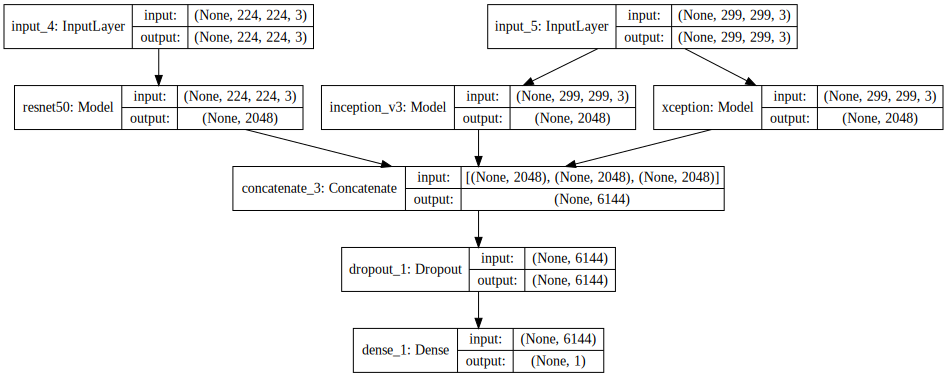

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

plot_model(model, show_shapes=True)
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))